In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [12]:
tickerQQQ = 'QQQ'
df = yf.download(tickerQQQ, '2020-01-01')                
                 

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [13]:
df

Price,Close,High,Low,Open,Volume
Ticker,QQQ,QQQ,QQQ,QQQ,QQQ
Date,,,,,
2020-01-02,209.325912,209.325912,207.214827,207.621547,30969400
2020-01-03,207.408478,208.657701,206.536938,206.556310,27518900
2020-01-06,208.744873,208.773923,205.529846,205.781620,21655300
2020-01-07,208.715790,209.306505,208.057296,208.822313,22139300
2020-01-08,210.284576,211.243282,208.357502,208.686749,26397300
...,...,...,...,...,...
2025-04-21,433.109985,439.079987,427.929993,438.230011,44149300
2025-04-22,444.480011,447.579987,437.619995,438.820007,52304400


<Axes: xlabel='Date'>

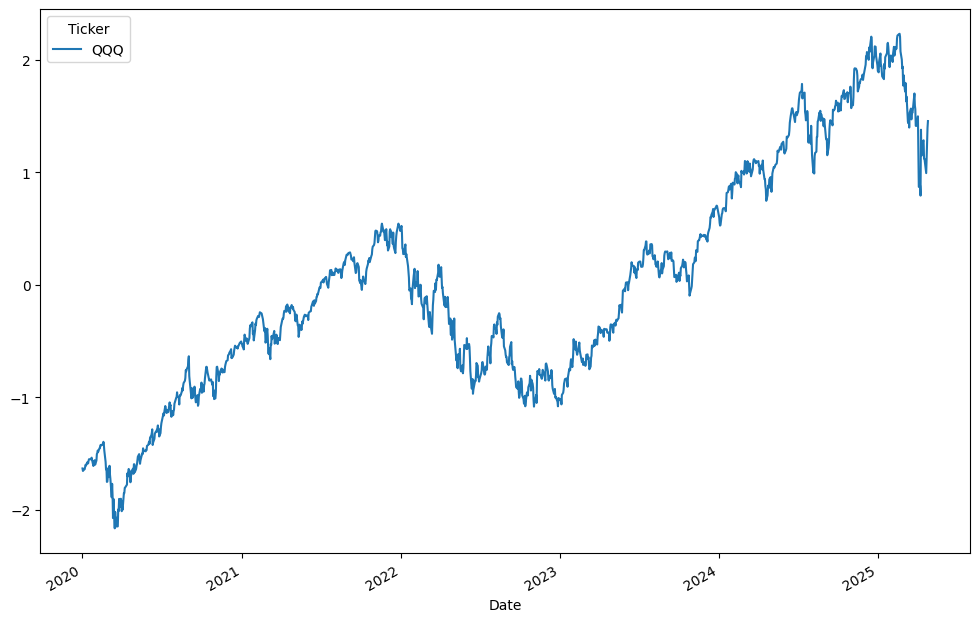

In [20]:
df.Close.plot(figsize=(12,8))

In [18]:
scaler = StandardScaler()
df['Close'] = scaler.fit_transform(df['Close'])

In [19]:
df.Close

Ticker,QQQ
Date,
2020-01-02,-1.631681
2020-01-03,-1.654179
2020-01-06,-1.638499
2020-01-07,-1.638840
2020-01-08,-1.620433
...,...
2025-04-21,0.994042
2025-04-22,1.127450
2025-04-23,1.245721


In [ ]:
seq_length = 31
data = []

for i in range(len(df) - seq_length:
    data.append(fd.Close[i:i+seq_length])
    